# Wireless Project

To load all the dependencies

In [11]:
import numpy as np
import math
# Module to display T/F matrix
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
# Module for Unit testing
import pytest
# Module for convolutionnal decoder
import sk_dsp_comm.fec_conv as fec

import binary_transformation
import crc
import qam16_demod
#import tests_hamming
#import tests_modulation

# 1 Extraction of the time frequency matrix

### 1.1 Load the CSV datafile that embed the ideal time frequency matrix

In [12]:
my_data = np.genfromtxt('./tfMatrix.csv', delimiter=';')
mat_complex = my_data[:,0::2] +1j*my_data[:,1::2]

print("The size of the matrix mat_complex is :",mat_complex.shape)

The size of the matrix mat_complex is : (14, 1024)


We have such a size because we have 14 symbols per frame and 1024 subcarriers available in this porject.

In [13]:
# --- Getting allocated subcarriers
tfMatrix_short = np.hstack((mat_complex[:, :312], mat_complex[:, -312:]))

print("Now the size of tfMatrix_short is :", tfMatrix_short.shape)

Now the size of tfMatrix_short is : (14, 624)


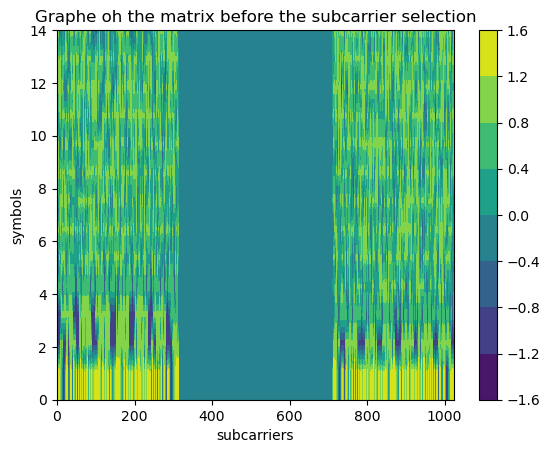

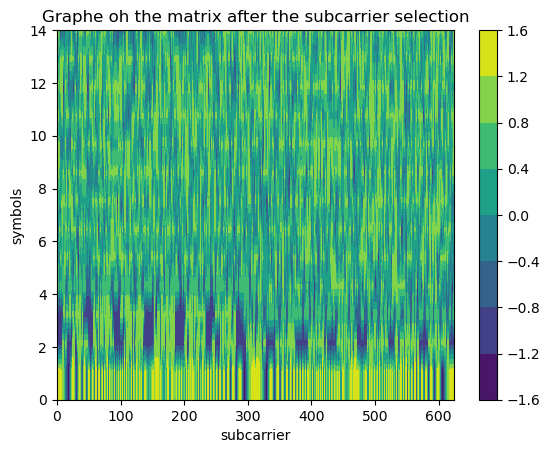

In [18]:
def powerDistributionGraph(Z, name, x, y):
    """
    Draw the power distribution graph
    """
    fig, ax = plt.subplots()
    cs = ax.contourf(np.linspace(0, len(Z[0]), len(Z[0])), np.linspace(0,len(Z), len(Z)), Z)
    cbar = fig.colorbar(cs)
    ax.set_title(name)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

powerDistributionGraph(mat_complex,'Graphe oh the matrix before the subcarrier selection','subcarriers','symbols')
powerDistributionGraph(tfMatrix_short,'Graphe oh the matrix after the subcarrier selection','subcarrier','symbols')

